Loading MNIST dataset...
Dataset keys: dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
X shape: (70000, 784)
y shape: (70000,)


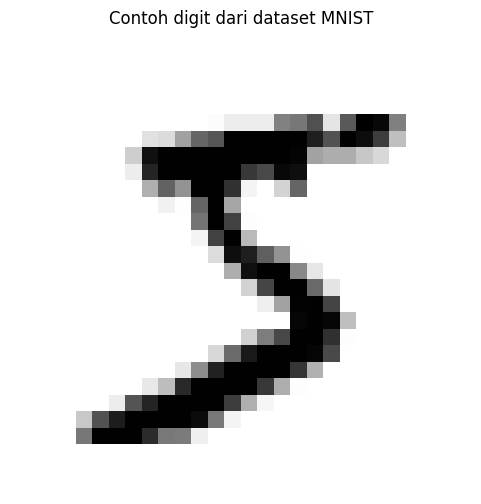


=== Binary Classification (Deteksi angka 5) ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


Prediksi untuk digit pertama (apakah angka 5?): True

=== Cross Validation Manual ===
Accuracy: 0.96690
Accuracy: 0.91625
Accuracy: 0.96785

=== Cross Validation dengan sklearn ===
CV Scores: [0.95035 0.96035 0.9604 ]
Mean CV Score: 0.95703
Dummy Classifier Scores: [0.91125 0.90855 0.90915]

=== Precision-Recall Analysis ===


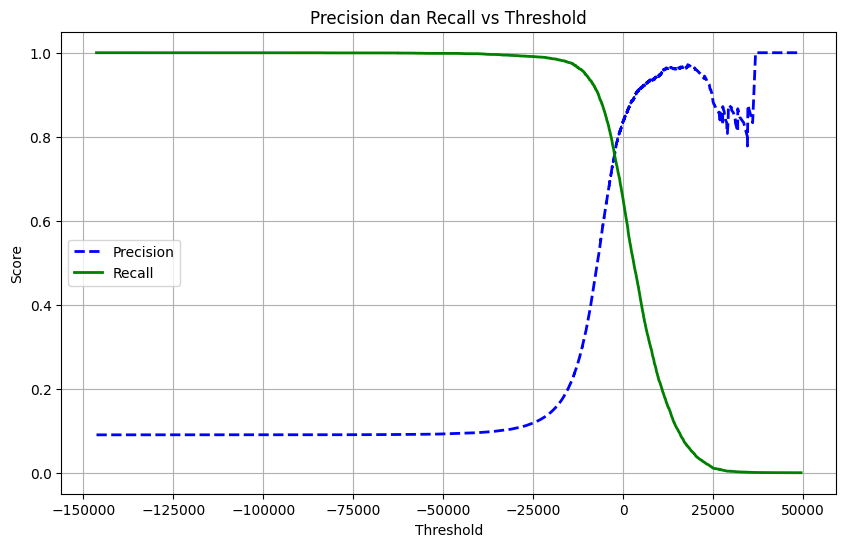

Threshold untuk precision 90%: 3370.0194991439557

=== ROC Curve Analysis ===


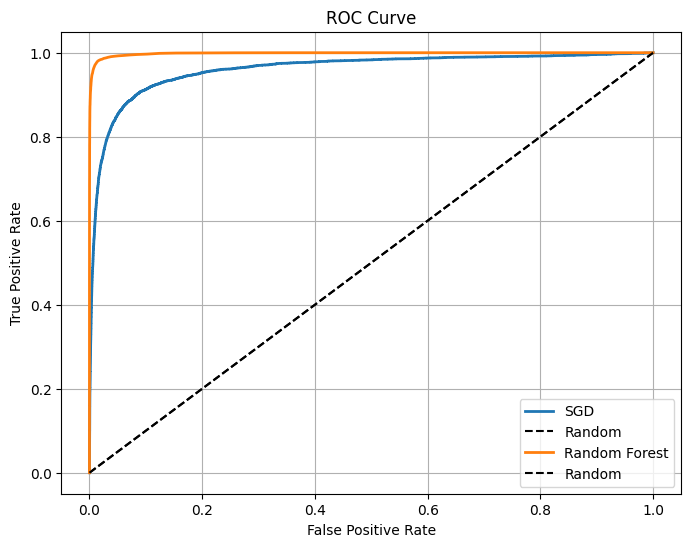


=== Multiclass Classification ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


SVM prediction untuk digit pertama: 5
Decision scores: [[ 1.72501977  2.72809088  7.2510018   8.3076379  -0.31087254  9.3132482
   1.70975103  2.76765202  6.23049537  4.84771048]]
Predicted class: 5
Available classes: [0 1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have va

OvR prediction: 5
Number of estimators: 10


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


SGD multiclass prediction: 3
SGD decision scores: [[-31893.03095419 -34419.69069632  -9530.63950739   1823.73154031
  -22320.14822878  -1385.80478895 -26188.91070951 -16147.51323997
   -4604.35491274 -12050.767298  ]]
SGD multiclass CV scores: [0.87365 0.85835 0.8689 ]

=== Feature Scaling ===
SGD dengan scaling CV scores: [0.8983 0.891  0.9018]
Improvement: 0.0301

=== Confusion Matrix ===
Confusion Matrix:
[[5577    0   22    5    8   43   36    6  225    1]
 [   0 6400   37   24    4   44    4    7  212   10]
 [  27   27 5220   92   73   27   67   36  378   11]
 [  22   17  117 5227    2  203   27   40  403   73]
 [  12   14   41    9 5182   12   34   27  347  164]
 [  27   15   30  168   53 4444   75   14  535   60]
 [  30   15   42    3   44   97 5552    3  131    1]
 [  21   10   51   30   49   12    3 5684  195  210]
 [  17   63   48   86    3  126   25   10 5429   44]
 [  25   18   30   64  118   36    1  179  371 5107]]


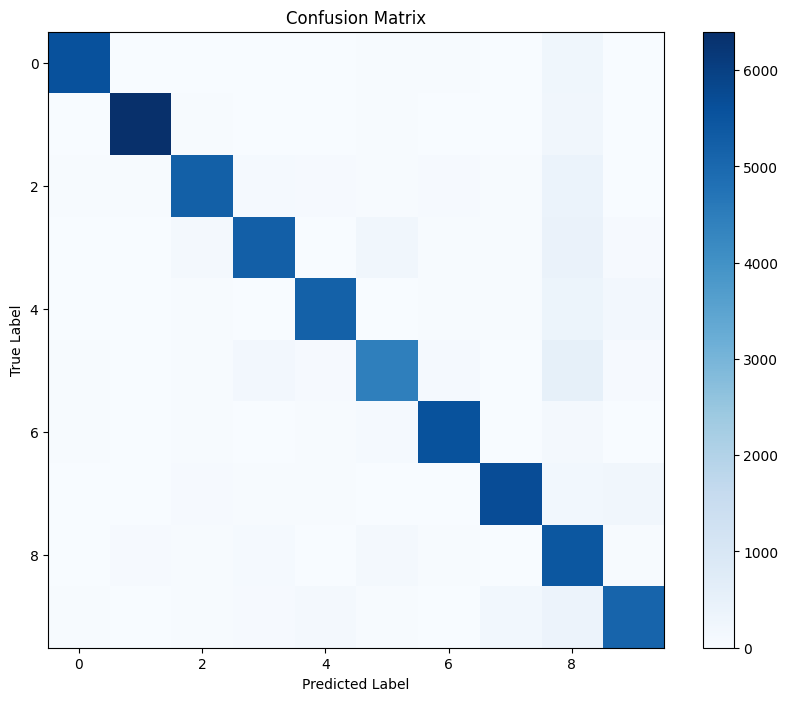

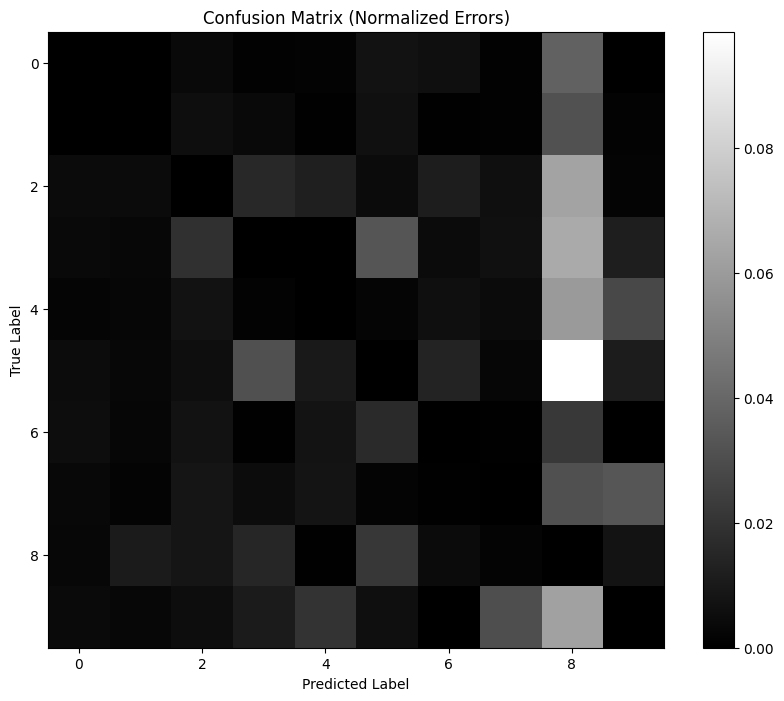


=== Error Analysis ===


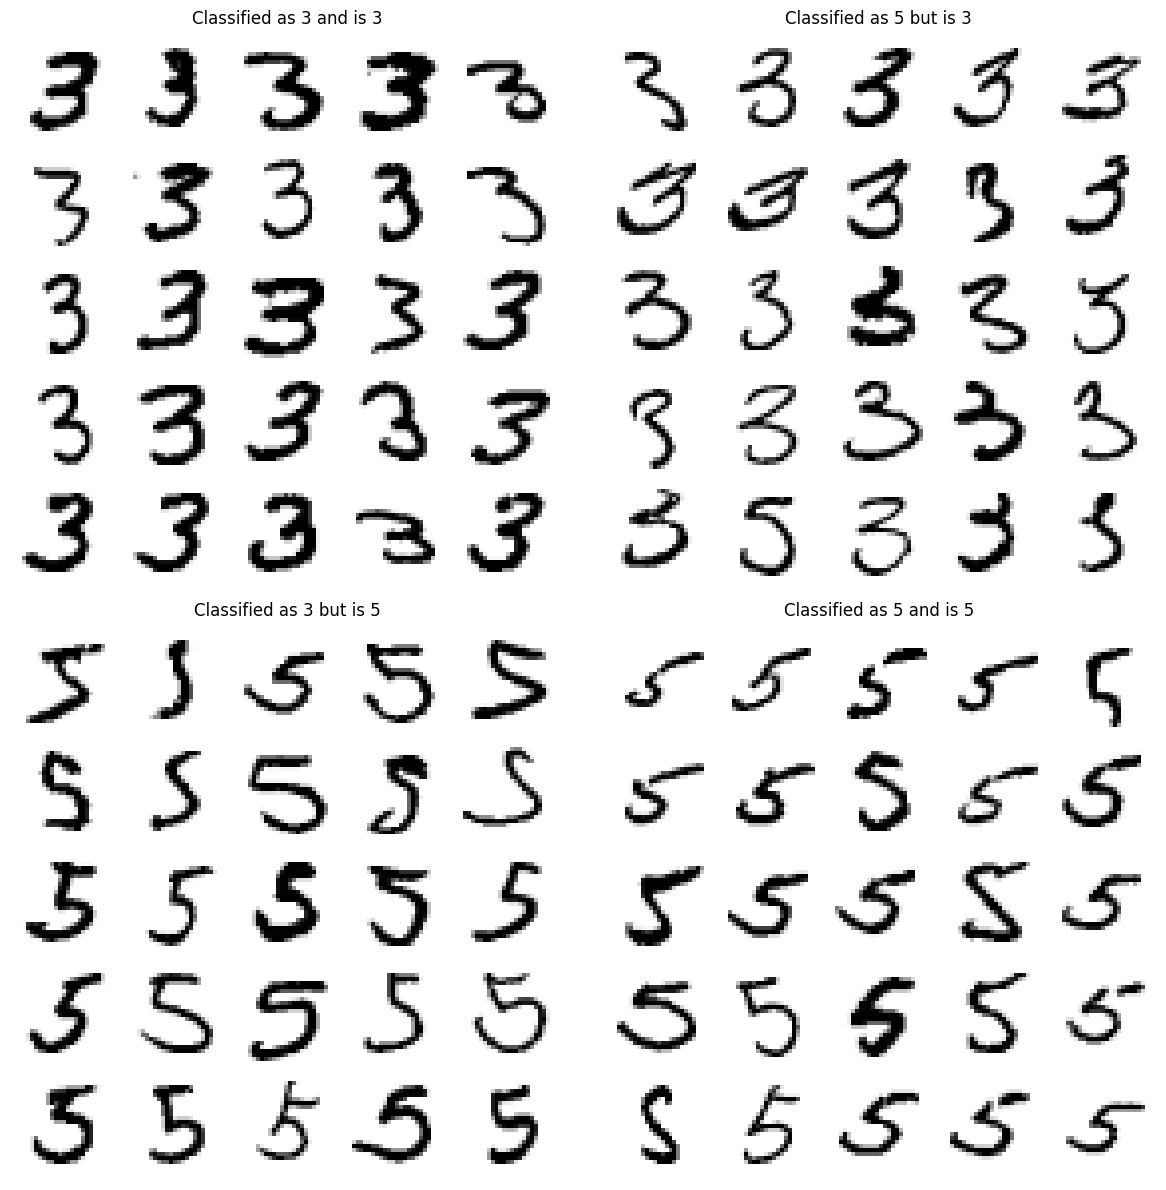


=== Multilabel Classification ===


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Multilabel prediction (large?, odd?): [False  True]
F1 score untuk multilabel: 0.976410

=== Multioutput Classification (Noise Reduction) ===
Training noise reduction model...


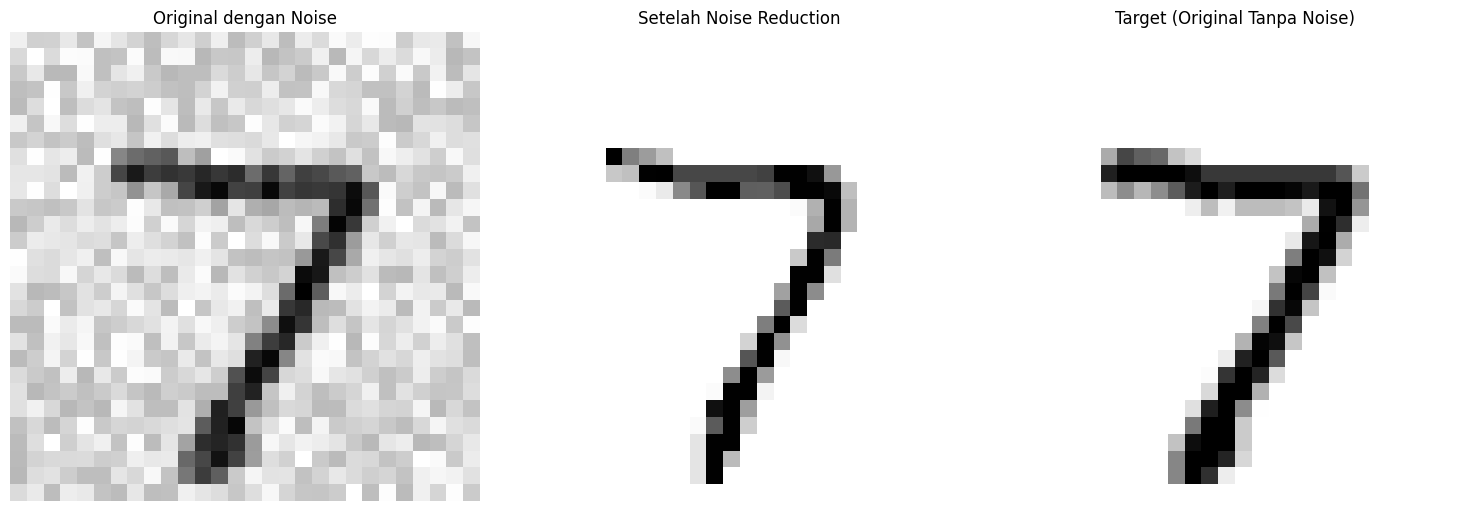

Analisis selesai!


In [2]:
# Import semua library yang diperlukan
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.base import clone, BaseEstimator
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 1. Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
print("Dataset keys:", mnist.keys())

X, y = mnist["data"], mnist["target"]
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# 2. Visualisasi contoh digit
def plot_digit(data):
    """Fungsi untuk menampilkan digit"""
    if data.ndim == 1:
        image = data.reshape(28, 28)
    else:
        image = data
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def plot_digits(instances, images_per_row=10, **options):
    """Fungsi untuk menampilkan beberapa digit sekaligus"""
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.extend([np.zeros((size, size))] * n_empty)
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap="binary", **options)
    plt.axis("off")

# Tampilkan contoh digit pertama
some_digit = X.iloc[0].values if hasattr(X, 'iloc') else X[0]
plt.figure(figsize=(6, 6))
plot_digit(some_digit)
plt.title("Contoh digit dari dataset MNIST")
plt.show()

# 3. Persiapan data
# Konversi target ke uint8
y = y.astype(np.uint8)

# Split data
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 4. Binary Classification (mendeteksi angka 5)
print("\n=== Binary Classification (Deteksi angka 5) ===")
y_train_5 = (y_train == 5)  # True untuk semua angka 5
y_test_5 = (y_test == 5)

# Training SGD Classifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

# Prediksi
prediction = sgd_clf.predict([some_digit])
print(f"Prediksi untuk digit pertama (apakah angka 5?): {prediction[0]}")

# 5. Cross Validation dengan StratifiedKFold
print("\n=== Cross Validation Manual ===")
skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
accuracies = []

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.iloc[train_index] if hasattr(X_train, 'iloc') else X_train[train_index]
    y_train_folds = y_train_5.iloc[train_index] if hasattr(y_train_5, 'iloc') else y_train_5[train_index]
    X_test_fold = X_train.iloc[test_index] if hasattr(X_train, 'iloc') else X_train[test_index]
    y_test_fold = y_train_5.iloc[test_index] if hasattr(y_train_5, 'iloc') else y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    accuracy = n_correct / len(y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy: {accuracy:.5f}")

# Cross validation dengan sklearn
print("\n=== Cross Validation dengan sklearn ===")
cv_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.5f}")

# 6. Dummy Classifier untuk perbandingan
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self

    def predict(self, X):
        return np.zeros((len(X),), dtype=bool)

never_5_clf = Never5Classifier()
dummy_scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
print(f"Dummy Classifier Scores: {dummy_scores}")

# 7. Precision-Recall Analysis
print("\n=== Precision-Recall Analysis ===")
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Dapatkan decision scores
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend(loc="center left")
    plt.grid(True)
    plt.title("Precision dan Recall vs Threshold")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

# Cari threshold untuk precision 90%
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(f"Threshold untuk precision 90%: {threshold_90_precision}")

y_train_pred_90 = (y_scores >= threshold_90_precision)

# 8. ROC Curve
print("\n=== ROC Curve Analysis ===")
fpr, tpr, roc_thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr, "SGD")

# Compare dengan Random Forest
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")
y_scores_forest = y_probas_forest[:, 1]  # score = probability of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.show()

# 9. Multiclass Classification
print("\n=== Multiclass Classification ===")

# SVM Classifier
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
svm_prediction = svm_clf.predict([some_digit])
print(f"SVM prediction untuk digit pertama: {svm_prediction[0]}")

# Decision function scores
some_digit_scores = svm_clf.decision_function([some_digit])
print(f"Decision scores: {some_digit_scores}")
print(f"Predicted class: {np.argmax(some_digit_scores)}")
print(f"Available classes: {svm_clf.classes_}")

# One-vs-Rest Classifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(X_train, y_train)
ovr_prediction = ovr_clf.predict([some_digit])
print(f"OvR prediction: {ovr_prediction[0]}")
print(f"Number of estimators: {len(ovr_clf.estimators_)}")

# SGD untuk multiclass
sgd_clf_multi = SGDClassifier(random_state=42)
sgd_clf_multi.fit(X_train, y_train)
sgd_prediction = sgd_clf_multi.predict([some_digit])
print(f"SGD multiclass prediction: {sgd_prediction[0]}")

sgd_scores = sgd_clf_multi.decision_function([some_digit])
print(f"SGD decision scores: {sgd_scores}")

# Cross validation untuk multiclass
sgd_cv_scores = cross_val_score(sgd_clf_multi, X_train, y_train, cv=3, scoring="accuracy")
print(f"SGD multiclass CV scores: {sgd_cv_scores}")

# 10. Feature Scaling
print("\n=== Feature Scaling ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

sgd_scaled_scores = cross_val_score(sgd_clf_multi, X_train_scaled, y_train, cv=3, scoring="accuracy")
print(f"SGD dengan scaling CV scores: {sgd_scaled_scores}")
print(f"Improvement: {sgd_scaled_scores.mean() - sgd_cv_scores.mean():.4f}")

# 11. Confusion Matrix
print("\n=== Confusion Matrix ===")
y_train_pred_multi = cross_val_predict(sgd_clf_multi, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred_multi)
print("Confusion Matrix:")
print(conf_mx)

# Visualisasi confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_mx, cmap=plt.cm.Blues, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Normalized confusion matrix (errors only)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

plt.figure(figsize=(10, 8))
plt.imshow(norm_conf_mx, cmap=plt.cm.gray, interpolation='nearest')
plt.title("Confusion Matrix (Normalized Errors)")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# 12. Error Analysis
print("\n=== Error Analysis ===")
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred_multi == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred_multi == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred_multi == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred_multi == cl_b)]

plt.figure(figsize=(12, 12))

plt.subplot(221)
plot_digits(X_aa.values[:25] if hasattr(X_aa, 'values') else X_aa[:25], images_per_row=5)
plt.title(f"Classified as {cl_a} and is {cl_a}")

plt.subplot(222)
plot_digits(X_ab.values[:25] if hasattr(X_ab, 'values') else X_ab[:25], images_per_row=5)
plt.title(f"Classified as {cl_b} but is {cl_a}")

plt.subplot(223)
plot_digits(X_ba.values[:25] if hasattr(X_ba, 'values') else X_ba[:25], images_per_row=5)
plt.title(f"Classified as {cl_a} but is {cl_b}")

plt.subplot(224)
plot_digits(X_bb.values[:25] if hasattr(X_bb, 'values') else X_bb[:25], images_per_row=5)
plt.title(f"Classified as {cl_b} and is {cl_b}")

plt.tight_layout()
plt.show()

# 13. Multilabel Classification
print("\n=== Multilabel Classification ===")
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

multilabel_prediction = knn_clf.predict([some_digit])
print(f"Multilabel prediction (large?, odd?): {multilabel_prediction[0]}")

y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1 = f1_score(y_multilabel, y_train_knn_pred, average="macro")
print(f"F1 score untuk multilabel: {f1:.6f}")

# 14. Multioutput Classification (Noise Reduction)
print("\n=== Multioutput Classification (Noise Reduction) ===")
np.random.seed(42)  # Untuk reproducibility

# Tambahkan noise ke training data
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train.values if hasattr(X_train, 'values') else X_train
X_train_mod = X_train_mod + noise

# Tambahkan noise ke test data
noise_test = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test.values if hasattr(X_test, 'values') else X_test
X_test_mod = X_test_mod + noise_test

# Target adalah gambar asli tanpa noise
y_train_mod = X_train.values if hasattr(X_train, 'values') else X_train
y_test_mod = X_test.values if hasattr(X_test, 'values') else X_test

# Training noise reduction model
print("Training noise reduction model...")
knn_clf_denoise = KNeighborsClassifier()
knn_clf_denoise.fit(X_train_mod, y_train_mod)

# Test noise reduction
some_index = 0
clean_digit = knn_clf_denoise.predict([X_test_mod[some_index]])

# Visualisasi hasil
plt.figure(figsize=(15, 5))

plt.subplot(131)
plot_digit(X_test_mod[some_index])
plt.title("Original dengan Noise")

plt.subplot(132)
plot_digit(clean_digit[0])
plt.title("Setelah Noise Reduction")

plt.subplot(133)
plot_digit(y_test_mod[some_index])
plt.title("Target (Original Tanpa Noise)")

plt.tight_layout()
plt.show()

print("Analisis selesai!")